<a href="https://colab.research.google.com/github/L0P0P/Classificazione_di_molecole_tramite_Random_Forest/blob/main/Classificazione_di_molecole_tramite_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progetto d'esame di Basi di Dati
**A.A. 2022/2023, 1° sessione autunnale**

**Docente:** *Stefano Ferretti* \
**Studente:** *Emanuele Grasso* \
**Matricola n°:** *307771*

# Classificazione di molecole tramite Random Forest
##Specifica del Problema
Questo progetto ha l'obiettivo di condurre un'analisi sui dati riguardanti la classificazione di diverse molecole, assegnando ciascuna molecola a una delle due categorie disponibili. \
\
Successivamente, si svilupperà un modello di classificazione, basato sull'algoritmo di Random Forest, che, in conformità con i dati forniti, possa eseguire una precisa classificazione binaria delle molecole, prevedendo con precisione a quale delle due classi appartiene ciascuna molecola.

In [1]:
import pickle
import seaborn as sns
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
  accuracy_score,
  precision_score,
  recall_score,
  precision_recall_curve,
  f1_score,
  average_precision_score,
  confusion_matrix,
  roc_curve,
  auc )

!wget -O X_dataset_Lymphocytes_B.pkl https://raw.githubusercontent.com/L0P0P/Classificazione_di_molecole_tramite_Random_Forest/main/datasets/X_dataset_Lymphocytes_B.pkl

!wget -O y_dataset_Lymphocytes_B.pkl https://raw.githubusercontent.com/L0P0P/Classificazione_di_molecole_tramite_Random_Forest/main/datasets/y_dataset_Lymphocytes_B.pkl

--2023-08-22 11:41:34--  https://raw.githubusercontent.com/L0P0P/Classificazione_di_molecole_tramite_Random_Forest/main/datasets/X_dataset_Lymphocytes_B.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24940416 (24M) [application/octet-stream]
Saving to: ‘X_dataset_Lymphocytes_B.pkl’

X_dataset_Lymphocyt 100%[===================>]  23.78M  --.-KB/s    in 0.1s    

2023-08-22 11:41:35 (168 MB/s) - ‘X_dataset_Lymphocytes_B.pkl’ saved [24940416/24940416]

--2023-08-22 11:41:35--  https://raw.githubusercontent.com/L0P0P/Classificazione_di_molecole_tramite_Random_Forest/main/datasets/y_dataset_Lymphocytes_B.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubuserc

##Analisi del Problema
I dati iniziali, sui quali si baserà l'analisi, sono contenuti nei seguenti file:\
\- X_dataset_Lymphocytes_B.pkl \
\- y_dataset_Lymphocytes_B.pkl \
Privi di valori nulli, con una corrispondenza tra il numero di righe del primo file e il numero di righe del secondo file, idonei per essere elaborati ad analizzati.\
\
In particolare, nel file "*X_dataset_Lymphocytes_B.pkl*", sono presenti tutte le caratteristiche associate alle istanze di molecole, dove, le colonne rappresentano le misurazioni condotte su diversi marcatori proteici.\
\
Mentre, nel file "*y_dataset_Lymphocytes_B.pkl*", sono presenti le etichette corrispondenti che indicano a quale classe appartiene ciascuna molecola.\
\
Seguono delle rappresentazioni, in forma tabellare, di un estratto di entrambi i file.

In [2]:
# Caricamento dei dati dai file pickle
with open('X_dataset_Lymphocytes_B.pkl', 'rb') as f:
    X_dataset = pickle.load(f)

with open('y_dataset_Lymphocytes_B.pkl', 'rb') as f:
    y_dataset = pickle.load(f)

# Stampa dei dati caricati come tabelle utilizzando tabulate
print("Dati caricati:\n")
print("X_dataset:")
print(tabulate(X_dataset[:5], headers='keys', tablefmt='pretty'))
print(f"\n\ny_dataset:\n\n{y_dataset[:5]}")

Dati caricati:

X_dataset:
+--------+------------+-----------+----------+---------+--------+------------+------------+
|        |   FSC-A    |   SSC-A   |   CD3    |   CD4   |  CD19  |    CD8     |    CD45    |
+--------+------------+-----------+----------+---------+--------+------------+------------+
| 14699  |  36406.3   |  18958.5  |  8914.5  |  18.75  | 190.5  |   5514.3   |   3874.5   |
| 114466 |  100106.3  | 137077.5  |  315.0   |  -1.5   |  -1.5  |    31.5    |   309.6    |
| 82522  |  81902.1   |  38712.0  |  98.25   |  472.5  | 411.0  | 109.799995 |   6565.5   |
| 166114 | 46380.5977 | 20576.25  | 16860.75 | 2421.75 | 1300.5 |   320.4    |  10421.1   |
| 41401  |  119617.4  | 256692.75 |  528.0   |  442.5  | 441.0  |    48.6    | 1567.79993 |
+--------+------------+-----------+----------+---------+--------+------------+------------+


y_dataset:

14699     0.0
114466    0.0
82522     0.0
166114    0.0
41401     0.0
Name: label, dtype: float64


## Progettazione dell'algoritmo
Come primo passaggio fondamentale, ho ritenuto necessario suddividere i dataset di partenza in insiemi di addestramento e di test, per poterli usare rispettivamente per addestrare il modello di Machine Learning e verificare che questo funzioni correttamente. \
Considerando che la parte di addestramento necessita di un maggior quantitativo di dati, questa sarà composta dall’80% dei dati di partenza. \
\
Inoltre, osservando le ridotte dimensioni dei dataset presi in input, ho volutamente deciso di omettere un'ulteriore partizione destinata alla validazione, questo perché potrebbe portare a una riduzione troppo significativa del numero di dati disponibili per l'addestramento e la valutazione.

In [3]:
# Divisione dei dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size=0.2, random_state=42)

##Implementazione dell'Algoritmo
A questo punto utilizzerò l'algoritmo di RandomForestClassifier; un algoritmo di apprendimento automatico che, durante il processo di addestramento, costruisce diversi alberi decisionali e impara come combinare le loro previsioni per ottenere risultati più accurati e stabili. \
In altre parole, il modello si adegua ai dati di addestramento per cercare e catturare dei pattern. \
\
Il parametro random_state=1010 imposta il generatore di numeri casuali per garantire la riproducibilità delle operazioni di casualità all'interno del modello, escludendo la completa casualità forzando l'algoritmo ad utilizzare la stessa sequenza di numeri casuali ogni volta che viene eseguito.

In [4]:
# Creazione e addestramento del modello (Random Forest)
model = RandomForestClassifier(random_state=1010)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1010)

##Verifica dei risultati ottenuti
Dopo aver addestrato il modello, lo utilizzo per effettuare previsioni sull'insieme di test *X_test*. \
Queste previsioni rappresentano delle classificazioni, autonomamente effettuate dal modello, per ciascuna istanza nei dati di test, ossia su dati che non ha mai visto prima. \
*y_pred* conterrà le etichette prodotte dal modello per l'insieme di test. \
\
Partendo da queste previsioni e dall'insieme di test originale, vado a calcolare diverse metriche di valutazione: \
\- accuratezza \
\- precisione \
\- recall \
\- F1-score \
\- matrice di confusione \
\- curva ROC \
\- curva precision-recall

In [5]:
# Previsioni del modello sul set di test
y_pred = model.predict(X_test)

# Calcolo delle metriche di valutazione
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Calcolo della curva ROC e AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Calcolo della curva Precision-Recall
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

In questo punto raccolgo in una tabella e mostro a schermo i risultati di: \

###1) Accuratezza
Metrica di valutazione utilizzata per misurare la percentuale di previsioni corrette effettuate dal modello rispetto al numero totale di previsioni. \

L'accuratezza è calcolata come:
$$Accuratezza = \frac{\text{Numero di previsioni corrette}}{\text{Numero totale di previsioni}}$$

###2) Precisione
Metrica di valutazione utilizzata per misurare quanto il modello è accurato quando prevede un'istanza come positiva, fornendo una stima di quante delle previsioni positive fatte dal modello sono effettivamente corrette. \

La precisione è calcolata come:
$$Precisione = \frac{\text{Veri positivi}}{\text{Veri positivi}+\text{Falsi positivi}}$$

Dove i "veri positivi" rappresentano il numero di istanze che il modello ha previsto come positive e che sono effettivamente positive, mentre, i "falsi positivi" rappresentano il numero di istanze che il modello ha previsto come positive ma che sono effettivamente negative. \

###3) Recall
Metrica di valutazione utilizzata per misurare quanto bene il modello è in grado di individuare tutte le istanze positive effettive, calcolando la frazione di istanze positive correttamente identificate dal modello rispetto al numero totale di istanze positive presenti nei dati di test.

La recall è calcolata come:
$$Recall = \frac{\text{Veri positivi}}{\text{Veri positivi}+\text{Falsi negativi}}$$

Dove i "veri positivi" rappresentano il numero di istanze positive che il modello ha previsto correttamente come positive, mentre, i "falsi negativi" rappresentano il numero di istanze positive che il modello ha previsto erroneamente come negative. \

###4) F1-Score
Metrica di valutazione che rappresenta la media armonica tra precisione e recall, utilizzata per valutare le prestazioni bilanciando l'importanza di avere sia previsioni accurate positive (precisione) che la capacità di individuare correttamente le istanze positive (recall).

L'F1-Score è calcolato come:
$$\text{F1-Score} = \frac{2\times\text{Precisione}\times\text{Recall}}{\text{Precisione}+\text{Recall}}$$ \
\
Sono state calcolate queste quattro metriche per coprire la maggior parte dei casi poiché l'accuratezza può essere fuorviante quando una classe è molto più comune dell'altra (il modello potrebbe ottenere un'alta accuratezza semplicemente prevedendo sempre la classe maggioritaria). \

La precisione non è sufficiente per valutare le prestazioni del modello da sola, poiché aumentare la precisione potrebbe portare a una diminuzione della recall e viceversa. \

La recall, come per la precisione, non è sufficiente per valutare le prestazioni del modello da sola. \

L'F1-score, essendo la media armonica tra precisione e recall, è influenzato da entrambe le metriche; pertanto, un valore alto, è sintomo che il modello sta ottenendo un buon equilibrio tra le previsioni accurate positive e la capacità di individuare istanze positive. \
\
Si può facilmente notare che tutte le metriche tendono al valore '1', questo è sintomo di ottime prestazioni del modello.

In [6]:
# Creazione della tabella per Accuracy, Precision, Recall e F1
table = [
    ["Accuracy", "Precision", "Recall", "F1-Score"],
    [accuracy, precision, recall, f1]
]

# Stampa della tabella
print(tabulate(table, headers='firstrow', tablefmt='grid'))

+------------+-------------+----------+------------+
|   Accuracy |   Precision |   Recall |   F1-Score |
+============+=============+==========+============+
|   0.996741 |    0.981839 | 0.981839 |   0.981839 |
+------------+-------------+----------+------------+


###Matrice di confusione
In questo punto calcolo la matrice di confusione per visualizzare il numero di previsioni fatte dal modello, rispetto alle vere etichette di quelle istanze. \
La matrice di confusione è organizzata in una struttura a 2x2, dato il problema di classificazione binaria, e i quattro possibili risultati delle previsioni sono (in ordine da in alto a sinistra fino a in basso a destra): \
\- Veri Negativi: I casi in cui il modello ha previsto correttamente la classe negativa. \
\- Falsi Positivi: I casi in cui il modello ha previsto erroneamente la classe positiva quando era negativa. \
\- Falsi Negativi: I casi in cui il modello ha previsto erroneamente la classe negativa quando era positiva. \
\- Veri Positivi: I casi in cui il modello ha previsto correttamente la classe positiva. \
\
Si può facilmente notare che la maggior parte dei risultati sono veri, sintomo di ottime prestazioni del modello.

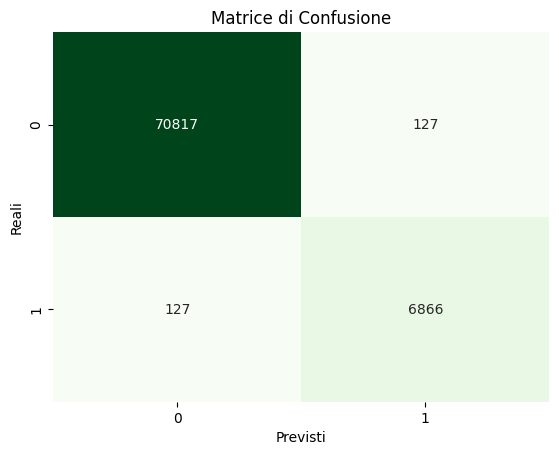

In [7]:
# Visualizza la matrice di confusione utilizzando Seaborn
plt.figure()
sns.heatmap(confusion, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Previsti')
plt.ylabel('Reali')
plt.title('Matrice di Confusione')
plt.show()

###Curva ROC
In questo punto mostro la curva ROC (Receiver Operating Characteristic) in un grafico che rappresenta la relazione tra il tasso di veri positivi e il tasso di falsi positivi al variare di una soglia di decisione. La curva ROC qui mostrata tende molto all'angolo in alto a sinistra (punto in cui il tasso di veri positivi è il più alto e il tasso di falsi positivi è il più basso), sintomo di buone prestazioni del modello che sta facendo previsioni corrette positive più spesso rispetto alle previsioni errate positive.

Si può anche facilmente notare che l'area sottostante alla curva ROC (AUC, Area Under the Curve) è molto grande e ciò indica che il modello ha una buona capacità di discriminazione tra le classi.

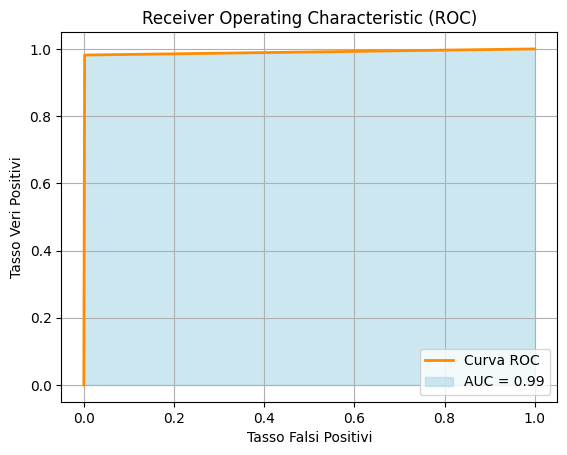

In [8]:
# Visualizza la curva Receiver Operating Characteristic (ROC) utilizzando matplotlib
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC')
plt.fill_between(fpr, tpr, color='lightblue', label='AUC = {:.2f}'.format(roc_auc) ,alpha=0.6)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Tasso Falsi Positivi')
plt.ylabel('Tasso Veri Positivi')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

###Curva Precisione-Recall
In questo punto mostro la curva Precisione-Recall (PR) in un grafico che, differenza della curva ROC, mostra la trade-off tra la precisione e la recall del modello al variare della soglia di decisione. La curva PR qui mostrata tende molto all'angolo in alto a destra (punto in cui la precisione e la recall sono le migliori), sintomo di prestazioni eccellenti poiché il modello sta facendo previsioni positive solo per le istanze in cui è molto sicuro di ottenere risultati corretti, riducendo i falsi positivi, ma allo stesso tempo, il modello è in grado di individuare correttamente la maggior parte delle istanze positive reali, aumentando la recall.

Si può anche facilmente notare che l'area sottostante alla curva PR (AP, Average Precision) è molto grande e ciò indica che il modello ha una buona capacità di mantenere elevate sia la precisione che la recall.

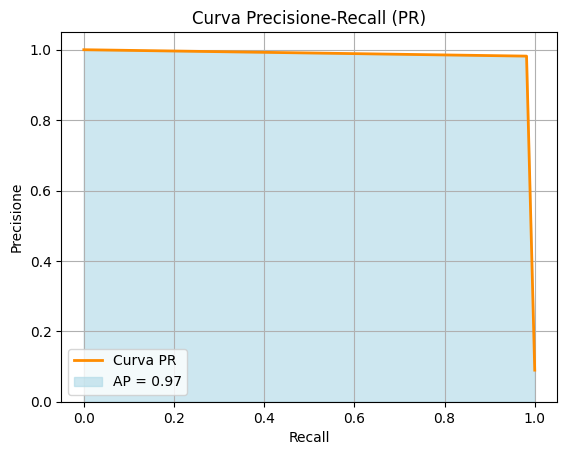

In [9]:
# Visualizza la curva Precision-Recall utilizzando matplotlib
plt.figure()
plt.plot(recall_curve, precision_curve, color='darkorange', lw=2, label='Curva PR')
plt.fill_between(recall_curve, precision_curve, color='lightblue', label='AP = {:.2f}'.format(average_precision) ,alpha=0.6)
plt.xlabel('Recall')
plt.ylabel('Precisione')
plt.title('Curva Precisione-Recall (PR)')
plt.xlim([-0.05, 1.05])
plt.ylim([0, 1.05])
plt.legend(loc="lower left")
plt.grid(True)
plt.show()